In [ ]:
!git clone https://github.com/Leejunho123/deep-learning-from-scratch-3.git
%cd /content/deep-learning-from-scratch-3

Cloning into 'deep-learning-from-scratch-3'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2104 (delta 1), reused 0 (delta 0), pack-reused 2097
Receiving objects: 100% (2104/2104), 34.94 MiB | 38.27 MiB/s, done.
Resolving deltas: 100% (1445/1445), done.
/content/deep-learning-from-scratch-3


## 58 대표적인 CNN(VGG16)

### 58.1 VGG16 구현
+ VGG 는 2014년 ILSVRC 대회에서 준우승한 모델
+ 모델의 구성
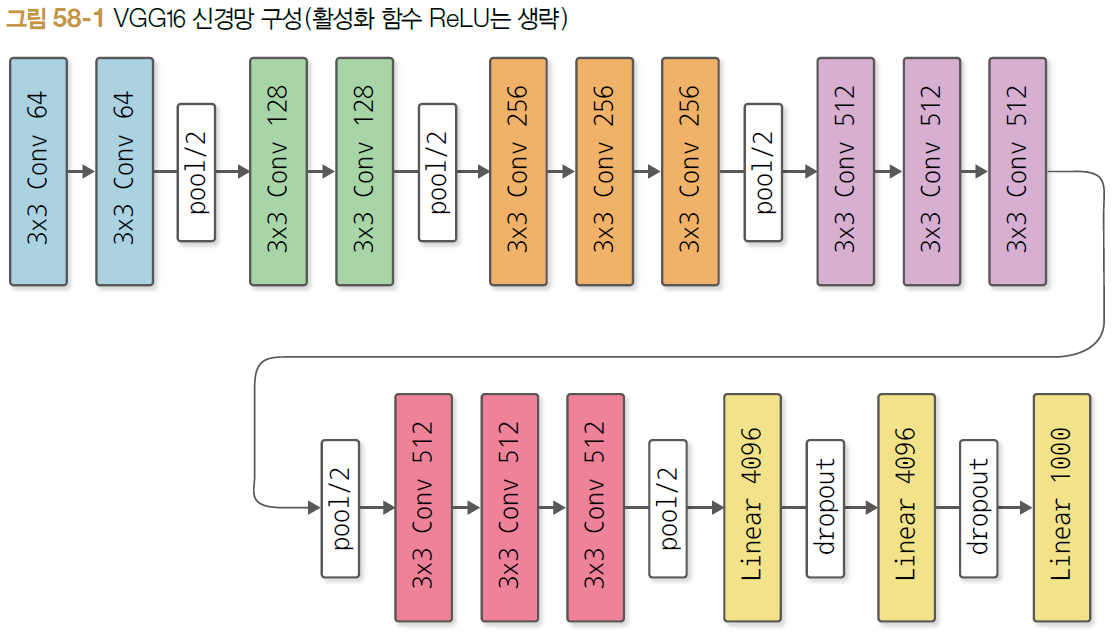

+ 설명 : 3x3 conv 74 커널의 크기 : 3x3 ,채널 수 : 64
+ pool/2 : 2x2 풀링
+ Linear 4096 : 출력 크기가 4096인 완전연결계층

+ VGG16의 특징
  - 3x3 합성곱층 사용(패딩 1x1)
  - 합성곱층의 채널 수는 풀링하면 2배로 증가
  - 완전연결계층에서는 드롭아웃 사용
  - 활성화 함수로는 ReLU 사용

In [ ]:
class VGG16(Model):

    def __init__(self):
        super().__init__()#1
        self.conv1_1 = L.Conv2d(64, kernel_size=3, stride=1, pad=1)
        self.conv1_2 = L.Conv2d(64, kernel_size=3, stride=1, pad=1)
        self.conv2_1 = L.Conv2d(128, kernel_size=3, stride=1, pad=1)
        self.conv2_2 = L.Conv2d(128, kernel_size=3, stride=1, pad=1)
        self.conv3_1 = L.Conv2d(256, kernel_size=3, stride=1, pad=1)
        self.conv3_2 = L.Conv2d(256, kernel_size=3, stride=1, pad=1)
        self.conv3_3 = L.Conv2d(256, kernel_size=3, stride=1, pad=1)
        self.conv4_1 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv4_2 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv4_3 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv5_1 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv5_2 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv5_3 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.fc6 = L.Linear(4096)#2
        self.fc7 = L.Linear(4096)
        self.fc8 = L.Linear(1000)



    def forward(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = F.pooling(x, 2, 2)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = F.pooling(x, 2, 2)
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        x = F.pooling(x, 2, 2)
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = F.pooling(x, 2, 2)
        x = F.relu(self.conv5_1(x))
        x = F.relu(self.conv5_2(x))
        x = F.relu(self.conv5_3(x))
        x = F.pooling(x, 2, 2)
        x = F.reshape(x, (x.shape[0], -1)) # 3
        x = F.dropout(F.relu(self.fc6(x)))
        x = F.dropout(F.relu(self.fc7(x)))
        x = self.fc8(x)
        return x

1. 실제 입력 데이터의 채널 수는 순전파 시에 데이터로부터 얻는다.
2. 완전연결계층 ( L.Linear 에서도 출력 크기만 지정)
3. 완전연결계층으로 전환하기 위해서 (4차원->2차원) reshape 사용 

### 58.2 학습된 가중치 데이터
+ 이미 학습된 W 데이터가 있다.

In [ ]:
class VGG16(Model):
    WEIGHTS_PATH = 'https://github.com/koki0702/dezero-models/releases/download/v0.1/vgg16.npz'

    def __init__(self, pretrained = False):#1
        super().__init__()#1
        self.conv1_1 = L.Conv2d(64, kernel_size=3, stride=1, pad=1)
        self.conv1_2 = L.Conv2d(64, kernel_size=3, stride=1, pad=1)
        self.conv2_1 = L.Conv2d(128, kernel_size=3, stride=1, pad=1)
        self.conv2_2 = L.Conv2d(128, kernel_size=3, stride=1, pad=1)
        self.conv3_1 = L.Conv2d(256, kernel_size=3, stride=1, pad=1)
        self.conv3_2 = L.Conv2d(256, kernel_size=3, stride=1, pad=1)
        self.conv3_3 = L.Conv2d(256, kernel_size=3, stride=1, pad=1)
        self.conv4_1 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv4_2 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv4_3 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv5_1 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv5_2 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.conv5_3 = L.Conv2d(512, kernel_size=3, stride=1, pad=1)
        self.fc6 = L.Linear(4096)#2
        self.fc7 = L.Linear(4096)
        self.fc8 = L.Linear(1000)

        if pretrained:#2
            weights_path = utils.get_file(VGG16.WEIGHTS_PATH)
            self.load_weights(weights_path)

1. pretrained 확인
2. pretrained weights load


Downloading: vgg16.npz
[##############################] 100.00% Done


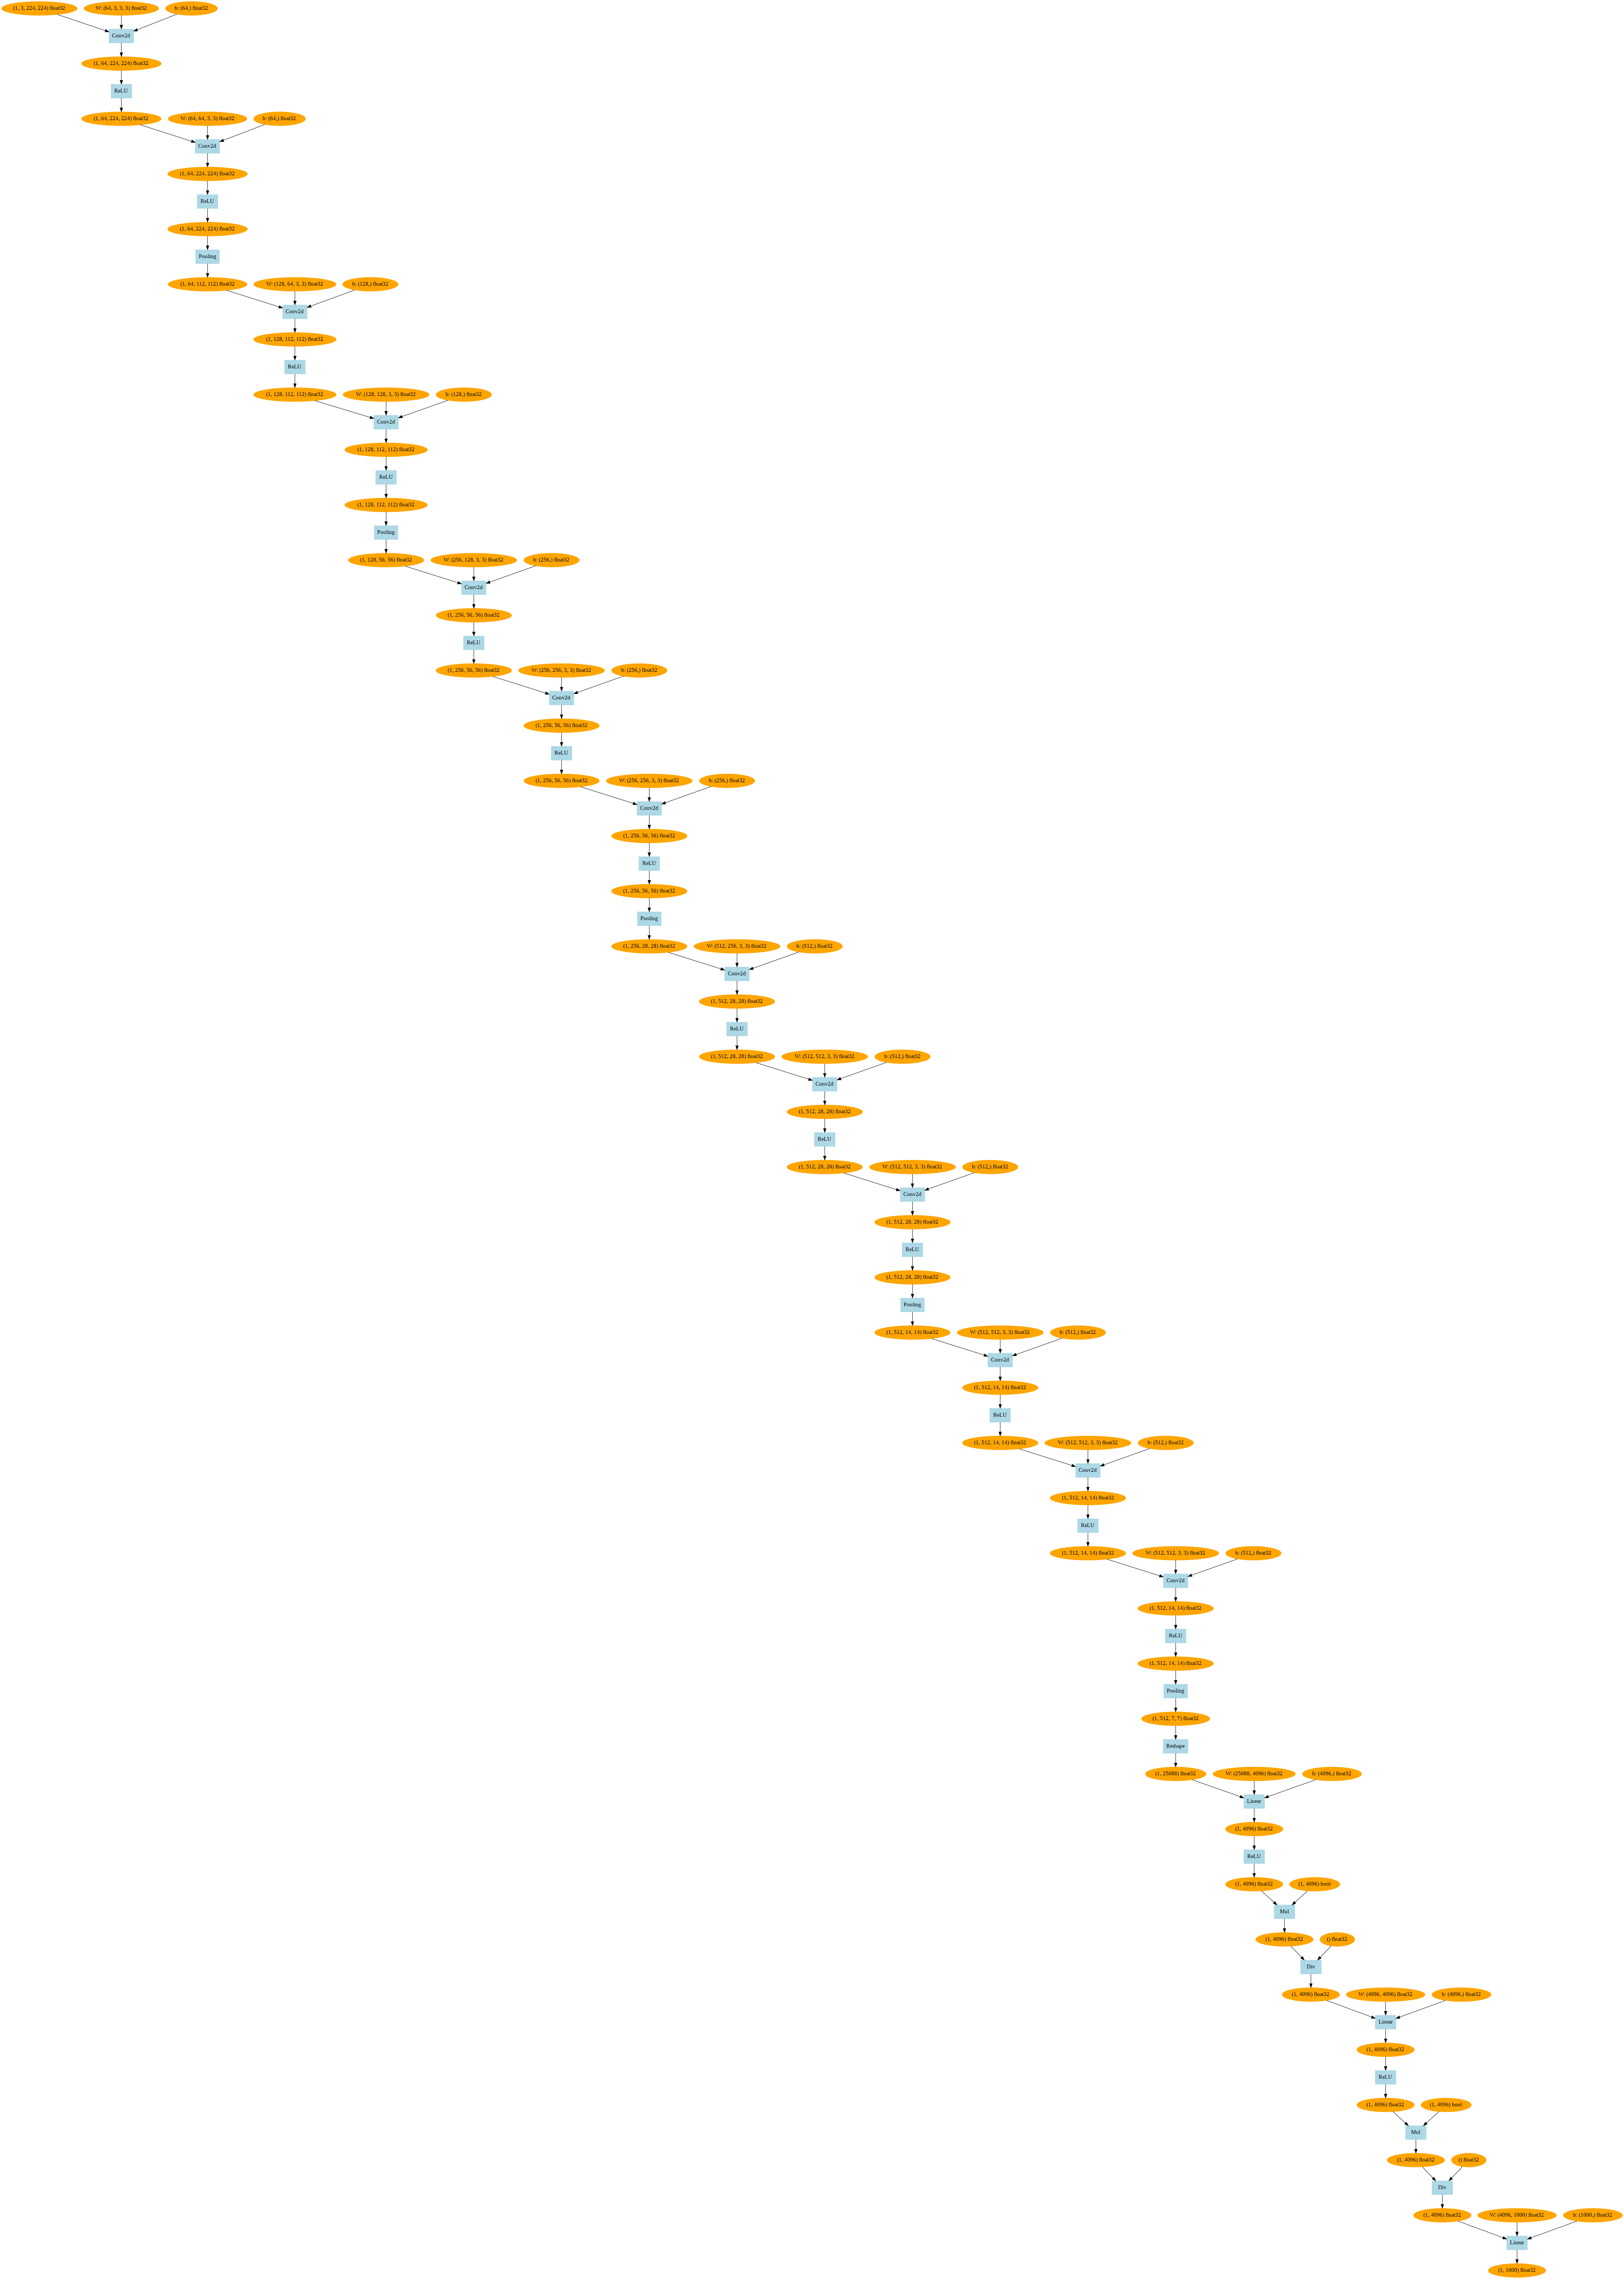

In [ ]:
import numpy as np
from dezero.models import VGG16

model = VGG16(pretrained=True)

x = np.random.randn(1,3,224,224).astype(np.float32)
model.plot(x)

### 58.3 학습된 VGG16 사용하기


In [ ]:
import dezero
from PIL import Image

url = 'https://github.com/WegraLee/deep-learning_from-scratch-3/raw/images/zebra.jpg'
img_path = dezero.utils.get_file(url)
img = Image.open(img_path)
img.show()

+ get_file 의 HTTP 오류로 인해 비슷한 이미지를 가져옴

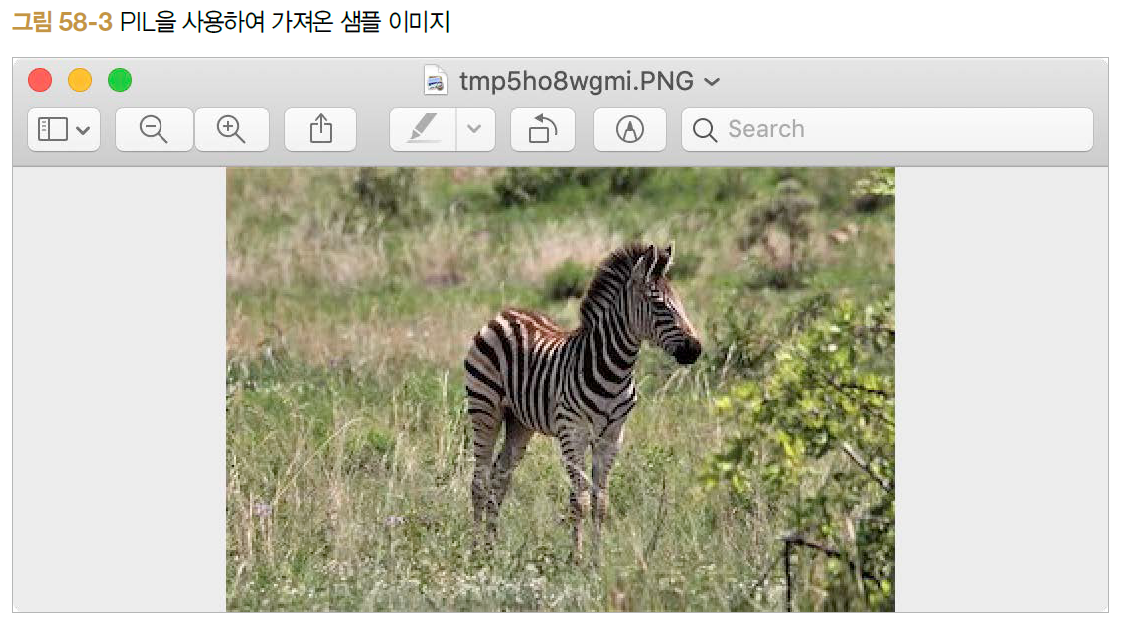

In [ ]:
import dezero
from PIL import Image
img = Image.open('/content/deep-learning-from-scratch-3/jebra.jpg')
img.show()

In [ ]:
import dezero
from dezero.models import VGG16

x = VGG16.preprocess(img)
print(type(x), x.shape)

<class 'numpy.ndarray'> (3, 224, 224)


+ 전처리로 (224,244) 크기 조정해서 돌려줌

In [9]:
import numpy as np
from PIL import Image
import dezero
from dezero.models import VGG16

img = Image.open('/content/deep-learning-from-scratch-3/jebra.jpg')
x = VGG16.preprocess(img)
x = x[np.newaxis]

model = VGG16(pretrained=True)
with dezero.test_mode():
  y = model(x)

predict_id = np.argmax(y.data)

model.plot(x, to_file='vgg.pdf')
labels = dezero.datasets.ImageNet.labels()
print(labels[predict_id])

zebra


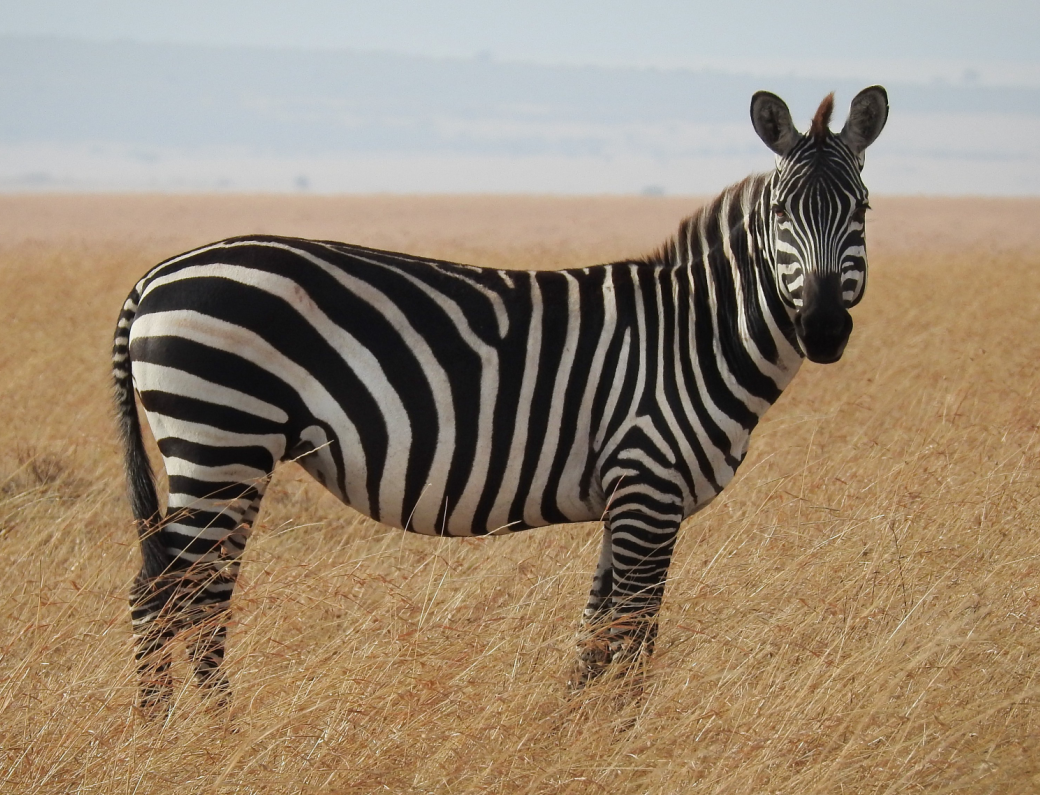